---

- __Author name:__ UBAIDULLAH

- __Email:__ [ai.bussiness.student0@gmail.com](mailto:ai.bussiness.student0@gmail.com)

- __GitHub:__ [github.com/ubaid-X/](https://github.com/ubaid-X/)

- __LinkedIn Profile:__ [linkedin.com/in/ubaid-ullah-634563373/](https://www.linkedin.com/in/ubaid-ullah-634563373/)

- __Kaggle:__ [kaggle.com/ubaidullah01](https://www.kaggle.com/ubaidullah01)

---

> # Mazeed pandas ki tips

#### starting | EDA
__Idea is called hypothsis__ 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import dataset
df = pd.read_excel('../5_Datasets/titanic_ex.xlsx')

In [4]:
# check data
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


> ## Missing values and imputing

> if missing value percentage is less than 30 than impute it if not than drop it

In [5]:
df.isnull().sum() / len(df) * 100


Unnamed: 0      0.000000
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [6]:
#1- drop the column having more than 70% of missing value from data set
df.drop('deck', axis=1, inplace=True)

In [7]:
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
# it is used for numeric values
df['age'].mean()

np.float64(29.69911764705882)

In [ ]:
# it is used for numeric values
df['age'].median()

np.float64(28.0)

In [28]:
# it is used for catagorical values
df['age'].mode()[0]

np.float64(29.69911764705882)

In [8]:
# 2- filling missing values of age column by the mean of age
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\Computer Valley\AppData\Local\Temp\ipykernel_7320\974154890.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [9]:
df.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [4]:
# now filling the embarked and embark_town column
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


C:\Users\Computer Valley\AppData\Local\Temp\ipykernel_1116\3959720562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
C:\Users\Computer Valley\AppData\Local\Temp\ipykernel_1116\3959720562.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [11]:
df.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: >

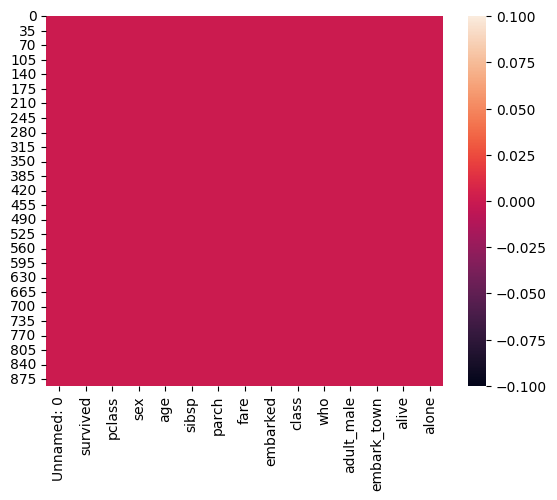

In [12]:
sns.heatmap(df.isnull())

# Assignment: if we don't impute or handle missing values, what will happened?

1- machine learning algorithm bilkol pareegh work kare ga.

2- some algorithm don't able to handle missing values.

3- some data types will not able  to link.

4- *Inaccurate Analysis*:
    - *mean, median, mode, correlation, erc* may be wrong or misleading.
    - Visualizations like __histograms or scatter plots__ can be skewed.

5- __Function Failures__:
    - Functions like `df.describe()`, `groupby()` or plotting functions may __ignore missing data or return NaN themselves__, leading to confusion.

6- __Inconsistance data shapes__
     - Operations like merging, aggregating or grouping may behave unexpectedly .

> # Binning

In [13]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [14]:
df.age.min()

np.float64(0.42)

In [15]:
df.age.max()

np.float64(80.0)

<Axes: xlabel='age', ylabel='Count'>

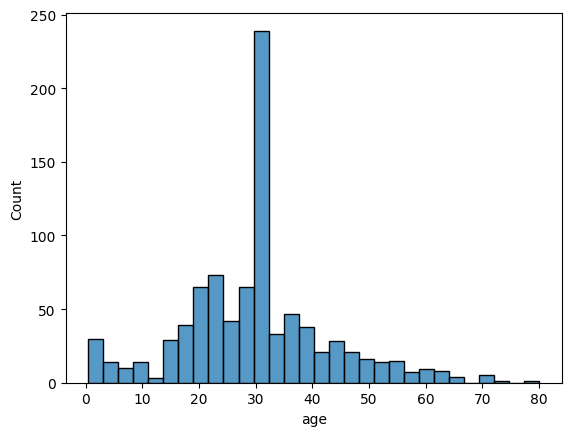

In [16]:
# histogram of it
sns.histplot(df['age'])

> Pic to understand Binning

![Bin1](./EDA_PIC/Bin_1.png)

![Bin2](./EDA_PIC/Bin_2.png)

In [17]:
# binning of age column into 7 categores
bins = [0, 1, 5, 12, 18, 30, 50, 80]
labels = ["babies", "Toddless", "kids", "Teens", "Young", "Middel Age", "Old" ]
pd.cut(df['age'], bins=bins, labels=labels)

0           Young
1      Middel Age
2           Young
3      Middel Age
4      Middel Age
          ...    
886         Young
887         Young
888         Young
889         Young
890    Middel Age
Name: age, Length: 891, dtype: category
Categories (7, object): ['babies' < 'Toddless' < 'kids' < 'Teens' < 'Young' < 'Middel Age' < 'Old']

In [18]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## Feature Engineering
1- add another column base on existance column

In [19]:
# adding bin_age catagorical column base on Age field to dataset
bins = [0, 1, 5, 12, 18, 30, 50, 80]
labels = ["babies", "Toddless", "kids", "Teens", "Young", "Middel Age", "Old" ]
df["Binned_Age"] = pd.cut(df['age'], bins=bins, labels=labels)

In [20]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Binned_Age
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middel Age
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middel Age
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middel Age


In [21]:
df.Binned_Age.value_counts()

Binned_Age
Young         447
Middel Age    241
Teens          70
Old            64
Toddless       30
kids           25
babies         14
Name: count, dtype: int64

In [ ]:
# 2- renaming column => featuring engineering
df.rename(columns={'Binned_Age': 'Age_Group'}, inplace=True)

In [ ]:
# 3- column droping also come in featuring engineering
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Age_Group
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Young
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Middel Age
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Young
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Middel Age
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Middel Age


In [43]:
df.groupby(['survived'])['Age_Group'].value_counts()

survived  Age_Group 
0         Young         299
          Middel Age    139
          Old            42
          Teens          40
          kids           16
          Toddless       11
          babies          2
1         Young         148
          Middel Age    102
          Teens          30
          Old            22
          Toddless       19
          babies         12
          kids            9
Name: count, dtype: int64

# Data Filteration

In [39]:
# based on column
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone', 'Age_Group'],
      dtype='object')

In [40]:
df_01 = df[['survived', 'Age_Group', 'fare', 'class']]

In [41]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   survived   891 non-null    int64   
 1   Age_Group  891 non-null    category
 2   fare       891 non-null    float64 
 3   class      891 non-null    object  
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 22.2+ KB


In [44]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [ ]:
# filtering the data based on rows criteria => catagorical
df_first = df_01[df_01['class'] == 'First']

,survived,Age_Group,fare,class
1,1,Middel Age,71.2833,First
3,1,Middel Age,53.1000,First
6,0,Old,51.8625,First
11,1,Old,26.5500,First
23,1,Young,35.5000,First
...,...,...,...,...
871,1,Middel Age,52.5542,First
872,0,Middel Age,5.0000,First
879,1,Old,83.1583,First
887,1,Young,30.0000,First


In [47]:
# select only those rows which have paid more than 200 pounds
df_200 = df_01[df_01['fare'] > 200]

In [49]:
df_200['class'].value_counts()

class
First    20
Name: count, dtype: int64

In [55]:
# how to add two filter
df_01[(df_01['fare'] > 70) & (df_01['class'] == 'First')].sort_values(by='fare')

,survived,Age_Group,fare,class
540,1,Middel Age,71.0000,First
745,0,Old,71.0000,First
1,1,Middel Age,71.2833,First
366,1,Old,75.2500,First
218,1,Middel Age,76.2917,First
...,...,...,...,...
341,1,Young,263.0000,First
438,0,Old,263.0000,First
258,1,Middel Age,512.3292,First
737,1,Middel Age,512.3292,First
